In [1]:
from sklearn.linear_model import LinearRegression  #used for regression and class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Explore the Dataset

In [2]:
path = 'Student_Performance.csv'  
df = pd.read_csv(path)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe(include="all")

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [5]:
df.duplicated().sum()

np.int64(127)

In [6]:
df.drop_duplicates(inplace=True)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [7]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
category_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical:", numeric_cols)
print("Categorical:", category_cols)


Numerical: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
Categorical: ['Extracurricular Activities']


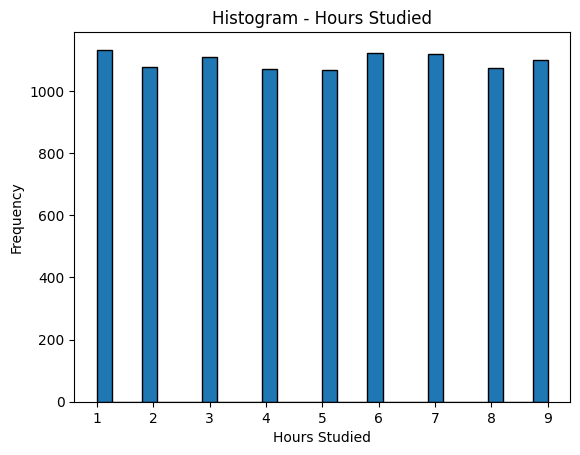

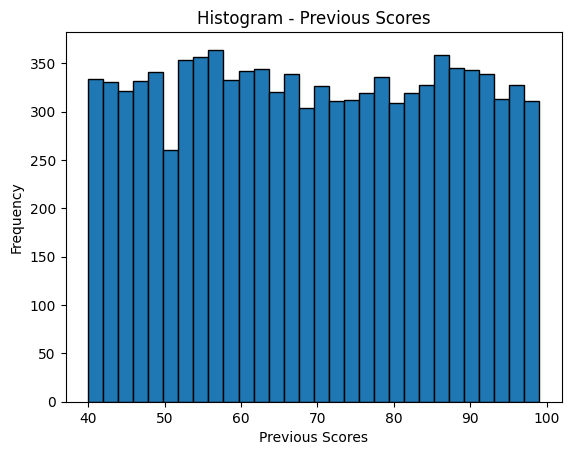

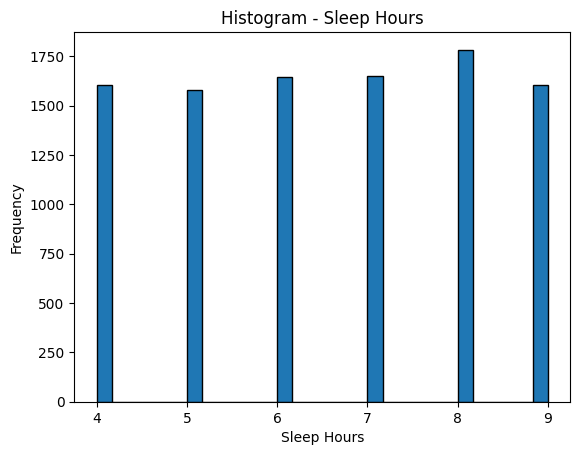

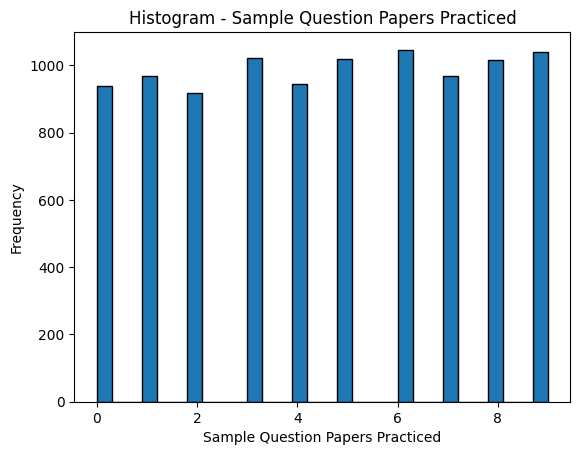

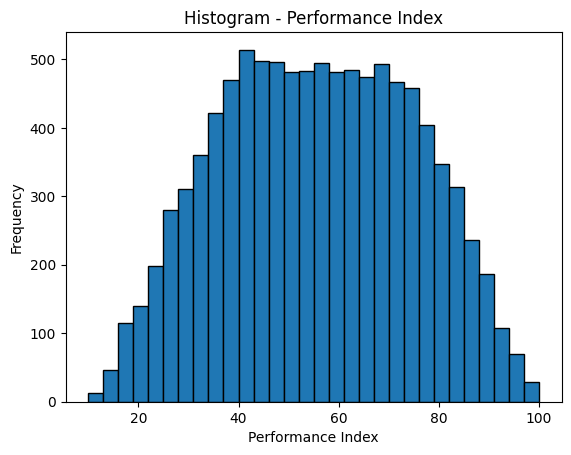

In [9]:
for col in numeric_cols:
    plt.figure()
    df[col].plot(kind='hist', bins=30, edgecolor='black')
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

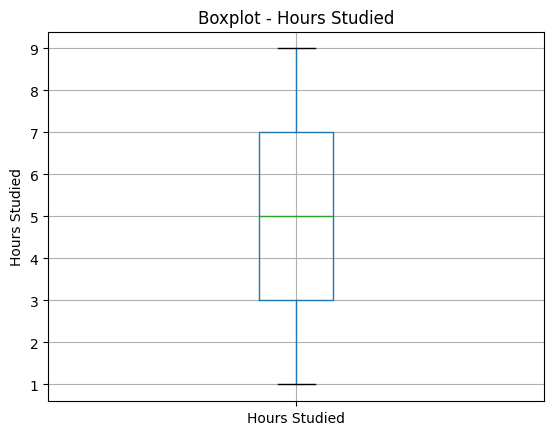

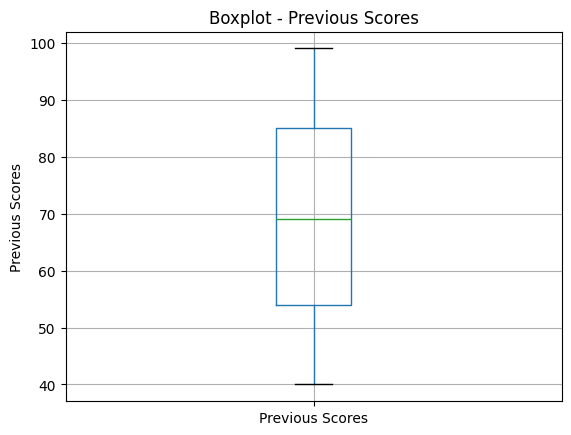

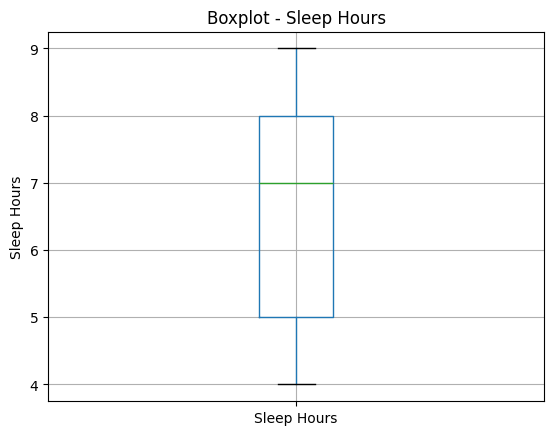

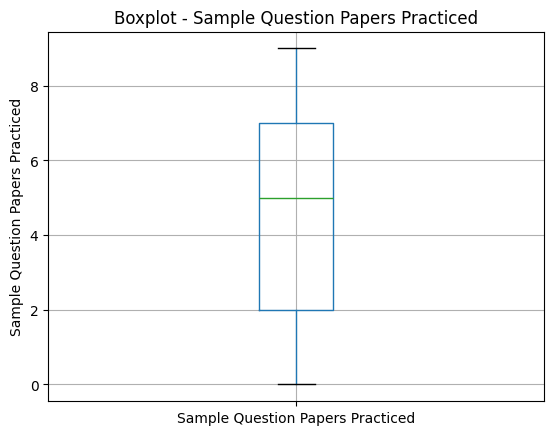

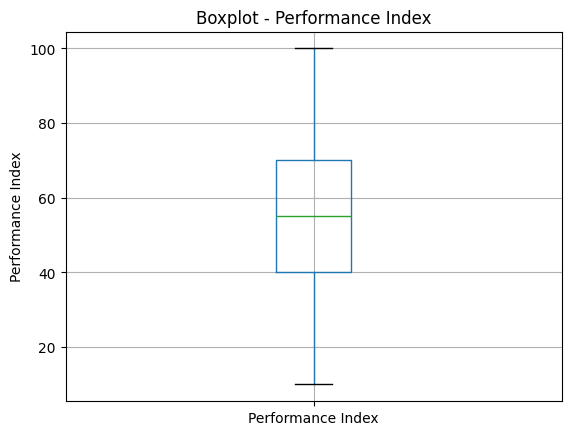

In [10]:
# Boxplot

for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot - {col}')
    plt.ylabel(col)
    plt.show()

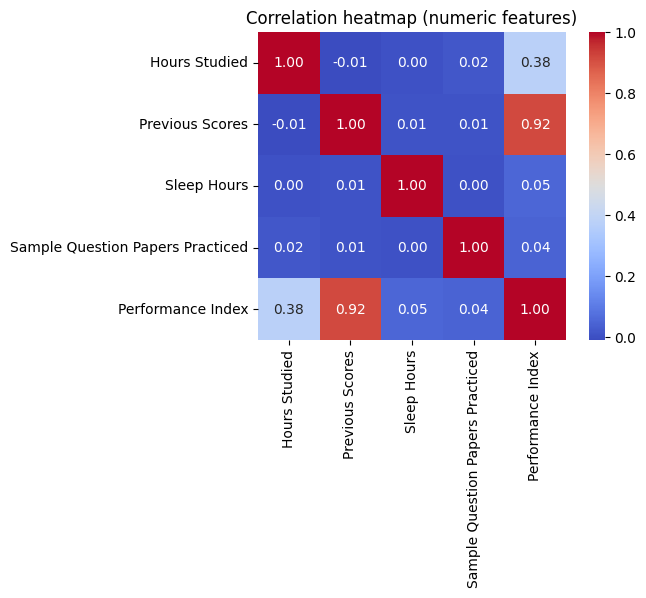

In [11]:
plt.figure(figsize=(6,4))
corr = df.select_dtypes(include=np.number).corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation heatmap (numeric features)")
plt.show()

# 2. Data Preprocessing

In [12]:
target = "Performance Index"
x = df.drop(columns=[target]).copy()
y = df[target].astype(float)
cat_cols = x.select_dtypes(include=["object"]).columns.tolist()
cat_cols

['Extracurricular Activities']

In [13]:
encoding = pd.get_dummies(x, columns=cat_cols, drop_first=True, dtype=int)

print("Encoded shape:", encoding.shape)
encoding.head()

Encoded shape: (9873, 5)


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0


In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    encoding, y, test_size=0.2, random_state=42)

# 3. Build the Regression Model

In [15]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 4. Evaluate the Model

In [16]:
y_predection = model.predict(x_test)
mse  = mean_squared_error(y_test, y_predection)
rmse = np.sqrt(mse)
print(f"coefficients: {model.coef_}") #the (_) is mean private variable and this not functions
print(f"intercept: {model.intercept_}")
print(f"MSE: {mse:.2f}")
print(f"r-squared: {r2_score(y_test,y_predection):.2f}")
print(f"number of feature: {model.n_features_in_}")
print(f"RMSE: {rmse:.3f}")

coefficients: [2.8510219  1.01843034 0.47207329 0.18870366 0.57382297]
intercept: -33.981324496440735
MSE: 4.31
r-squared: 0.99
number of feature: 5
RMSE: 2.075


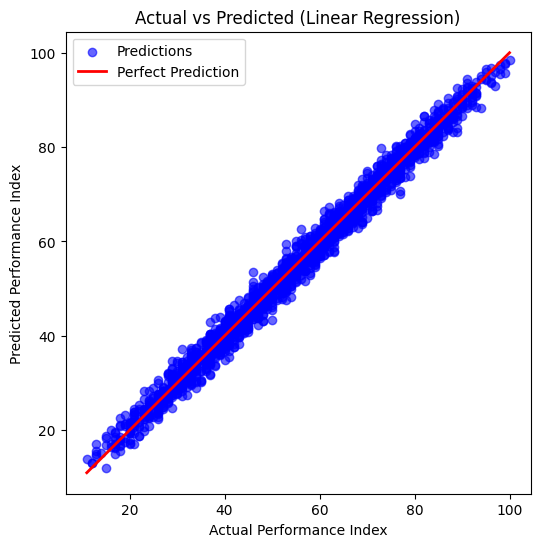

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predection, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted (Linear Regression)")
plt.legend()
plt.show()